# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.723829e+01     1.356083e+01
 * time: 0.0013930797576904297
     1     3.078055e+01     8.133413e+00
 * time: 0.00613093376159668
     2     2.729106e+01     5.792536e+00
 * time: 0.011039018630981445
     3     2.179920e+01     2.334171e+00
 * time: 0.015944957733154297
     4     2.003271e+01     1.233882e+00
 * time: 0.020081043243408203
     5     1.929961e+01     1.231458e+00
 * time: 0.024652957916259766
     6     1.895822e+01     1.099032e+00
 * time: 0.029053926467895508
     7     1.864767e+01     8.408108e-01
 * time: 0.03311300277709961
     8     1.840557e+01     8.651851e-01
 * time: 0.037261009216308594
     9     1.824249e+01     7.313607e-01
 * time: 0.0413510799407959
    10     1.808401e+01     5.646619e-01
 * time: 0.04564404487609863
    11     1.796836e+01     5.508904e-01
 * time: 0.049859046936035156
    12     1.793530e+01     1.194844e+00
 * time: 0.0531618595123291
    13     1.787437e+01     8.526209e-01
 

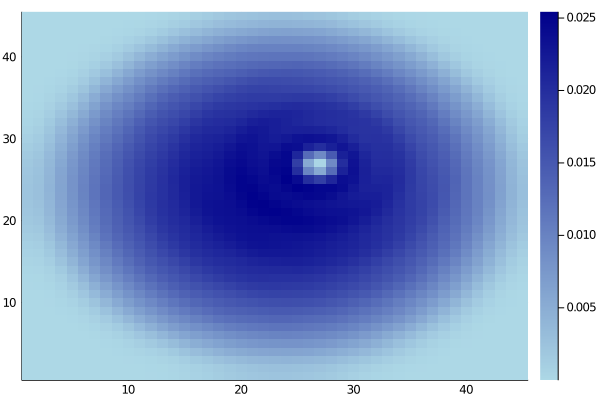

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)